<a href="https://colab.research.google.com/github/mchhour31/NN_work/blob/main/linear_classification_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# import required packages/libraries
import tensorflow as tf

In [67]:
tf.__version__

'2.9.2'

In [68]:
# load in the data
from sklearn.datasets import load_breast_cancer

In [69]:
# check the type
df = load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [70]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [71]:
type(df)

sklearn.utils.Bunch

In [72]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [73]:
df.data.shape

(569, 30)

In [74]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [75]:
df.target.shape

(569,)

In [76]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [77]:
X = df.data
y = df.target

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
N, D = X_train.shape # rows, cols

In [79]:
X_train.shape

(398, 30)

In [80]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
X_train

array([[ 2.62226376,  1.72738115,  2.57715431, ...,  2.23120277,
         0.36354128,  0.15118466],
       [ 0.63774394,  0.3227402 ,  0.64320569, ...,  0.67737749,
         0.36354128, -0.11999896],
       [-0.96931678,  1.33470996, -0.97076988, ..., -0.81398709,
         0.88251828, -0.15013047],
       ...,
       [ 0.98088857,  1.21354285,  1.02501529, ...,  0.88968233,
        -1.23578979,  0.50537206],
       [-0.84635662, -1.02356103, -0.87946759, ..., -1.09552177,
        -1.67335863, -0.62427541],
       [-1.55609411,  0.38332376, -1.52480881, ..., -1.33059554,
         0.14136485, -0.39743628]])

In [82]:
# neural net model

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(D,)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print(f"Train Score: {model.evaluate(X_train, y_train)}")
print(f"Test Score: {model.evaluate(X_test, y_test)}")

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 0.8648 - accuracy: 0.4196 - val_loss: 0.7507 - val_accuracy: 0.5146
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7818 - accuracy: 0.5276 - val_loss: 0.6756 - val_accuracy: 0.6023
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7090 - accuracy: 0.5980 - val_loss: 0.6124 - val_accuracy: 0.6901
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.6633 - val_loss: 0.5584 - val_accuracy: 0.7427
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.7035 - val_loss: 0.5135 - val_accuracy: 0.7602
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5498 - accuracy: 0.7613 - val_loss: 0.4759 - val_accuracy: 0.7953
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.7814 - val_loss: 0.4444 - val_accuracy: 0.8187
Epoch 8/100


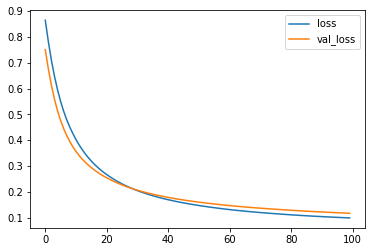

In [83]:
import matplotlib.pyplot as plt

# plotting what has been returned by model.fit()
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

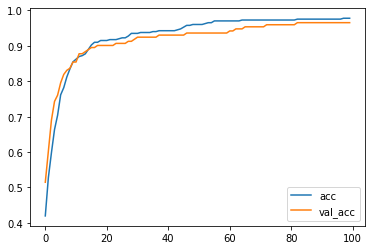

In [84]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()